## Libraries

In [1]:
import sys
try:
    sys.getwindowsversion()
except AttributeError:
    isWindows = False
else:
    isWindows = True
if isWindows:
    import win32api,win32process,win32con
    pid = win32api.GetCurrentProcessId()
    handle = win32api.OpenProcess(win32con.PROCESS_ALL_ACCESS, True, pid)
    win32process.SetPriorityClass(handle, win32process.HIGH_PRIORITY_CLASS)
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from datetime import datetime
import time
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import itertools

%matplotlib inline

C:\Users\Song\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Song\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Data set

In [2]:
df=pd.read_csv("train.csv", engine = 'c')
df2=pd.read_csv("test.csv", engine = 'c')

df3=pd.read_csv("zipCodeMarketingCosts.csv", engine = 'c')

In [3]:
print("Table 1: Summary of Values Train")
df3.describe()

Table 1: Summary of Values Train


,marketingCost,zip
count,20265.000000,20265.000000
mean,5.473901,60524.006415
std,5.673370,23069.433531
min,0.800000,778.000000
25%,2.050000,39479.000000
50%,2.910000,60624.000000
75%,4.670000,78413.000000
max,18.000000,99950.000000


In [4]:
df['zip'] = df['zip'].map(lambda x: x.rstrip('-')).astype(int)
df2['zip'] = df2['zip'].map(lambda x: x.rstrip('-')).astype(int)

df3['zip'] = df3['zip'].astype(int)
df = pd.merge(df, df3, how='left', on=['zip'])
df2 = pd.merge(df2, df3, how='left', on=['zip'])

In [5]:
print("Table 1: Summary of Values Train")
df.describe()

Table 1: Summary of Values Train


,date,title,zip,dob,age,numchld,income_range,wealth1,hit,mbcraft,...,nextdate,timelag,avggift,id,responded,amount,hphone_d,rfa_2f,cluster2,marketingCost
count,182190.000000,182190.000000,182190.000000,182190.000000,137091.000000,23642.000000,141573.000000,96822.000000,182190.000000,81303.000000,...,163192.000000,163192.000000,182190.000000,182190.000000,182190.000000,9249.000000,182190.000000,182190.000000,181940.000000,182190.000000
mean,9141.343746,54.011032,64259.473270,2726.705170,61.593722,1.527747,3.886129,5.349063,3.314781,0.151790,...,9151.115594,8.097468,13.334883,91094.500000,0.050766,26.550695,0.501032,1.910039,31.542470,6.777915
std,343.435045,944.160699,23969.472985,2132.260681,16.662907,0.805797,1.854540,2.742582,9.234371,0.469216,...,294.266119,8.296798,10.657192,52593.867109,0.219519,21.134328,0.500000,1.073082,18.763625,6.332381
min,8306.000000,0.000000,801.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,7211.000000,0.000000,1.285714,0.000000,0.000000,1.700000,0.000000,1.000000,1.000000,0.800000
25%,8801.000000,0.000000,40475.000000,201.000000,48.000000,1.000000,2.000000,3.000000,0.000000,0.000000,...,8903.000000,4.000000,8.400000,45547.250000,0.000000,17.000000,0.000000,1.000000,15.000000,2.200000
50%,9201.000000,1.000000,63105.000000,2611.000000,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,...,9204.000000,6.000000,11.647059,91094.500000,0.000000,22.100000,1.000000,2.000000,32.000000,3.240000
75%,9501.000000,2.000000,90007.000000,4601.000000,75.000000,2.000000,5.000000,8.000000,3.000000,0.000000,...,9409.000000,11.000000,15.500000,136641.750000,0.000000,34.000000,1.000000,3.000000,49.000000,12.490000
max,9701.000000,72002.000000,99950.000000,9710.000000,98.000000,7.000000,7.000000,9.000000,241.000000,6.000000,...,9702.000000,1088.000000,1000.000000,182189.000000,1.000000,340.000000,1.000000,4.000000,62.000000,18.000000


In [6]:
print("Table 2: Summary of Values Test")
df2.describe()

Table 2: Summary of Values Test


,date,title,zip,dob,age,numchld,income_range,wealth1,hit,mbcraft,...,fistdate,nextdate,timelag,avggift,id,hphone_d,rfa_2f,cluster2,market,marketingCost
count,9589.000000,9589.000000,9589.000000,9589.000000,7121.000000,1258.000000,7426.000000,5065.000000,9589.000000,4250.000000,...,9589.000000,8553.000000,8553.000000,9589.000000,9589.000000,9589.000000,9589.000000,9573.000000,0.0,9589.000000
mean,9142.042966,56.013036,64409.436855,2667.456252,61.917006,1.526232,3.866281,5.273840,3.462092,0.159529,...,9136.631244,9150.074477,7.999649,13.557183,186984.000000,0.494838,1.912712,31.458686,NaN,6.818464
std,344.008383,1082.231853,23800.486452,2135.373861,16.740526,0.822145,1.861111,2.743986,10.657110,0.489436,...,318.168742,294.279649,6.184006,12.509176,2768.250199,0.499999,1.068861,18.754063,NaN,6.338107
min,8601.000000,0.000000,1754.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,7401.000000,7401.000000,0.000000,1.869048,182190.000000,0.000000,1.000000,1.000000,NaN,0.800000
25%,8801.000000,0.000000,42050.000000,0.000000,49.000000,1.000000,2.000000,3.000000,0.000000,0.000000,...,8811.000000,8903.000000,4.000000,8.285714,184587.000000,0.000000,1.000000,14.000000,NaN,2.200000
50%,9201.000000,1.000000,63108.000000,2601.000000,63.000000,1.000000,4.000000,6.000000,0.000000,0.000000,...,9202.000000,9204.000000,6.000000,11.500000,186984.000000,0.000000,2.000000,32.000000,NaN,3.240000
75%,9501.000000,2.000000,90004.000000,4410.000000,76.000000,2.000000,5.000000,8.000000,3.000000,0.000000,...,9409.000000,9409.000000,11.000000,15.400000,189381.000000,1.000000,3.000000,49.000000,NaN,12.550000
max,9601.000000,72002.000000,99835.000000,9710.000000,98.000000,5.000000,7.000000,9.000000,241.000000,4.000000,...,9603.000000,9702.000000,52.000000,506.500000,191778.000000,1.000000,4.000000,62.000000,NaN,18.000000


## Missing Values

In [7]:
df.isnull().T.any().T.sum()

182190

In [8]:
df2.isnull().T.any().T.sum()

9589

In [9]:
print("Table 3: Summary of Categorical Values Train")
df[df.columns[df.dtypes == "O"]].describe()

Table 3: Summary of Categorical Values Train


,source,state,mailcode,has_chapter,noexch,recinhse,recp3,recpgvg,recsweep,mdmaud,...,rfa_21,rfa_22,rfa_23,rfa_24,rfa_2r,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,geocode2
count,182190,182190,182190,182190,182190,182190,182190,182190,182190,182190,...,182190,182190,182190,182190,182190,182190,182190,182190,182190,181940
unique,896,57,2,3,6,2,2,2,2,28,...,102,117,87,97,1,4,5,4,5,5
top,MBC,CA,,,0,,,,,XXXX,...,,,,,L,F,X,X,X,A
freq,8687,33126,179516,179416,99968,169335,178338,181975,179111,181633,...,67158,48959,107448,70572,182190,89726,181633,181633,181633,65830


In [10]:
print("Table 3: Summary of Categorical Values Test")
df2[df2.columns[df2.dtypes == "O"]].describe()

Table 3: Summary of Categorical Values Test


,source,state,mailcode,has_chapter,noexch,recinhse,recp3,recpgvg,recsweep,mdmaud,...,rfa_21,rfa_22,rfa_23,rfa_24,rfa_2r,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,geocode2
count,9589,9589,9589,9589,9589,9589,9589,9589,9589,9589,...,9589,9589,9589,9589,9589,9589,9589,9589,9589,9573
unique,510,51,2,3,5,2,2,2,2,14,...,93,105,59,83,1,4,5,4,5,5
top,MBC,CA,,,0,,,,,XXXX,...,,,,,L,F,X,X,X,A
freq,431,1729,9452,9430,5475,8954,9386,9576,9412,9554,...,3615,2596,5675,3763,9589,4682,9554,9554,9554,3479


## Transformations 

In [11]:
log_columns = ['title','dob','localgov','stategov','fedgov',
               'pop901','pop902','pop903']

for column in log_columns:
    df[column+'*'] = np.log(df[column]+1)

df = df.drop(columns=log_columns)

In [12]:
log_columns = ['title','dob','localgov','stategov','fedgov',
               'pop901','pop902','pop903']

for column in log_columns:
    df2[column+'*'] = np.log(df2[column]+1)

df2 = df2.drop(columns=log_columns)

## Plotting 

In [13]:
# plt.rcParams['figure.max_open_warning']=40
# colnames=list(df.select_dtypes(exclude='O').columns.values)
# for i in colnames[0:]:
#     facet = sns.FacetGrid(df,hue='responded',aspect=2)
#     facet.map(sns.distplot,i)
#     facet.add_legend()
#     facet.fig.suptitle(''.join(map(str, list(["Figure ",colnames.index(i)+1,": ",i," Distribution By Label"]))))
#     plt.show()

In [14]:
# plt.rcParams['figure.max_open_warning']=40
# colnames=list(df.select_dtypes(include='O').columns.values)
# for i in colnames[0:]:
#     ax = plt.axes()
#     sns.countplot(x=i, data=df, ax = ax)
#     ax.set_title(''.join(map(str, list(["Figure ",colnames.index(i)+24,": ",i," Distribution By Label"]))))
#     plt.show()

In [15]:
# ax = plt.axes()
# sns.heatmap(df.select_dtypes(exclude='O').corr(), cmap="YlGnBu", ax = ax)
# ax.set_title('Figure 51: Correlation Heatmap of Variables')
# plt.show()

## Dropping Nonnumericals

In [16]:
df=df.select_dtypes(exclude='O').drop(columns='amount')
df2=df2.select_dtypes(exclude='O')

## Mean Imputation

In [17]:
colnames=list(df.drop(['responded'], axis=1).select_dtypes(exclude='O').columns.values)
for i in colnames[0:]:
    if pd.notnull(i):
        mean = df[i].mean()
        df[i] = df[i].fillna(mean)

In [18]:
colnames=list(df2.drop(['market'], axis=1).select_dtypes(exclude='O').columns.values)
for i in colnames[0:]:
    if pd.notnull(i):
        mean = df2[i].mean()
        df2[i] = df2[i].fillna(mean)

## Metrics and Training

In [19]:
y = df.pop('responded')

x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=2)

def get_metrics(y_true, y_pred, treshhold=.5):
    RocAuc=metrics.roc_auc_score(y_test, y_pred)
    y_pred = (y_pred > treshhold).astype(np.int32)
    return dict(
        RocAuc="{:.4f}".format(metrics.roc_auc_score(y_test, y_pred)),
        Accuracy="{:.4f}".format(metrics.accuracy_score(y_test, y_pred)),
        Precision="{:.4f}".format(metrics.precision_score(y_test, y_pred)),
        Recall="{:.4f}".format(metrics.recall_score(y_test, y_pred)),
        F1="{:.4f}".format(metrics.f1_score(y_test, y_pred))
    )

In [20]:
#x_train, x_test, y_train, y_test = train_test_split(df, y_int, test_size=0.33, random_state=2, stratify=y_int)
skf = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 2)

## Models and Metrics

In [21]:
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
print("Test Dataset :", get_metrics(y_test, model2.predict(x_test)))

Test Dataset : {'RocAuc': '0.8732', 'Accuracy': '0.9720', 'Precision': '0.7115', 'Recall': '0.7630', 'F1': '0.7364'}


In [22]:
model3 = RandomForestClassifier(n_jobs=-1)
model3.fit(x_train, y_train)
print("Test Dataset :", get_metrics(y_test, model3.predict(x_test)))

Test Dataset : {'RocAuc': '0.7814', 'Accuracy': '0.9774', 'Precision': '0.9915', 'Recall': '0.5630', 'F1': '0.7182'}


In [23]:
model4 = RandomForestClassifier(n_estimators=100, oob_score=True,n_jobs=-1, random_state=2)
model4.fit(x_train, y_train)
print("Test Dataset :", get_metrics(y_test, model4.predict(x_test)))

Test Dataset : {'RocAuc': '0.8756', 'Accuracy': '0.9872', 'Precision': '0.9986', 'Recall': '0.7512', 'F1': '0.8574'}


## Hyperparameter optimization...computationally expensive...will do this had given more time

In [24]:
# # Performing RanmomizedSearch to tune the hyperparameters for the RF Classifier
# hyperparameters = {'min_samples_split': [2,3,4],
#                    'max_features': ['auto', 'sqrt', 'log2'],
#                    'criterion': ['entropy'],
#                   }
# rfc = RandomForestClassifier(n_jobs=-1, random_state=2, n_estimators=100)

# search =  GridSearchCV(rfc, hyperparameters, cv=5, scoring='roc_auc')
# # Training the model
# search.fit(x_train, y_train)
# # Best parameters to use to build the final model
# best_rfc = search.best_estimator_
# best_rfc

## Combining results to Test Table

In [25]:
df2 = df2.drop(columns='market')

In [26]:
df4=pd.read_csv("test.csv", engine = 'c')

In [27]:
df4['market'] = model4.predict(df2)

In [28]:
df4

,date,source,title,state,zip,mailcode,has_chapter,dob,noexch,recinhse,...,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2,market
0,9301,TRE,1,FL,34461,,,2001,0,,...,1,L,2,F,X,X,X,52.0,C,0
1,9101,PV3,1002,CA,91106,,,0,0,,...,0,L,1,F,X,X,X,24.0,A,0
2,8601,MBC,0,MN,56470,,,4305,0,,...,0,L,3,D,X,X,X,59.0,D,0
3,8601,BHG,0,IN,47441,,,0,0,,...,0,L,4,D,X,X,X,59.0,D,0
4,9501,AIR,0,NC,28906,,,4201,0,,...,0,L,1,F,X,X,X,60.0,D,0
5,9401,ARG,0,OR,97266,,,3501,0,,...,1,L,1,F,X,X,X,4.0,B,1
6,8601,WKB,0,MS,39213,,,2401,0,,...,1,L,1,F,X,X,X,51.0,B,0
7,9401,MSD,2,LA,71254,,,2401,0,,...,0,L,1,F,X,X,X,62.0,D,0
8,9001,CRM,1,CA,93536,,,2712,0,X,...,0,L,1,F,X,X,X,12.0,A,0
9,8601,BHG,2,TN,38478,,,0,0,,...,1,L,1,F,X,X,X,55.0,D,0


In [29]:
df4.to_csv('test_final.csv', index=False)

## Feature Importance

In [30]:
feature_importances = pd.Series(model4.feature_importances_, index=df.columns)
feature_importances.sort_values()

adate_5     0.000000
adate_15    0.000000
adate_20    0.000013
rdate_5     0.000047
adate_3     0.000057
adate_2     0.000074
ramnt_5     0.000080
maxadate    0.000287
rdate_4     0.000296
eth12       0.000466
rdate_3     0.000476
ramnt_4     0.000542
ramnt_3     0.000601
pop90c1     0.000641
rdate_6     0.000667
adate_4     0.000747
adate_14    0.000758
eth6        0.000785
hphone_d    0.000796
tpe6        0.000812
anc15       0.000817
adate_6     0.000835
adate_24    0.000841
hc15        0.000846
eth11       0.000889
adate_8     0.000897
afc3        0.000899
adate_19    0.000904
adate_9     0.000907
adate_23    0.000928
              ...   
malevet     0.003916
ic5         0.003919
dma         0.003922
hv1         0.003958
hv2         0.004087
maxramnt    0.004140
eic4        0.004166
tpe13       0.004263
cardgift    0.004266
lastdate    0.004319
pec2        0.004486
ngiftall    0.004486
lastgift    0.004715
id          0.004796
dob*        0.004930
pop901*     0.005129
timelag     0

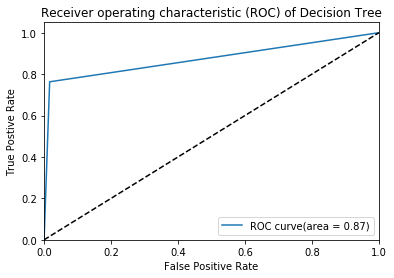

In [31]:
# Visualizing -> Area Under the Curve (AUC) for the best model
fpr, tpr, thresholds = roc_curve(y_test, model2.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='ROC curve(area = %0.2f)' %roc_auc_score(y_test, model2.predict_proba(x_test)[:,1]))
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic (ROC) of Decision Tree')
plt.legend(loc='lower right')
plt.show()

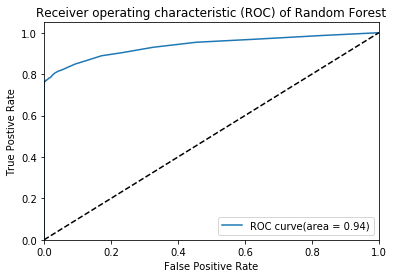

In [32]:
# Visualizing -> Area Under the Curve (AUC) for the best model
fpr, tpr, thresholds = roc_curve(y_test, model4.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='ROC curve(area = %0.2f)' %roc_auc_score(y_test, model4.predict_proba(x_test)[:,1]))
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic (ROC) of Random Forest')
plt.legend(loc='lower right')
plt.show()